<a href="https://colab.research.google.com/github/georgeragan/MNISTS/blob/main/MNIST_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import seaborn as sns


In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [9]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
cv2_imshow(X_train[0])


In [5]:
Y_train[0]

5

In [6]:
X_train=X_train/255
X_test=X_test/255

BULIDING NEURAL NETWORK

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")

])

COMPILING

In [14]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ACCURACY ON TRAINING

In [15]:
history=model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3032 - accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1444 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0709 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0611 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0532 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

ACCURACY ON TESING

In [16]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1083 - accuracy: 0.9713


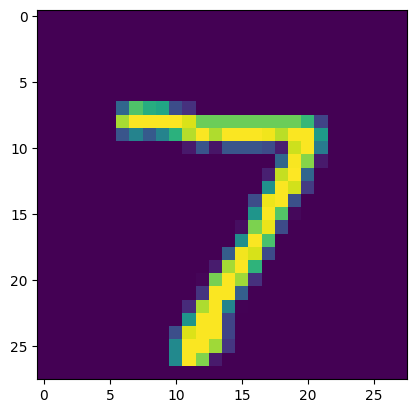

In [18]:
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [21]:
Y_pred[0]

array([9.1189833e-04, 2.7380792e-02, 2.5103876e-01, 8.0891812e-01,
       7.4903928e-06, 5.2533211e-05, 3.1175330e-07, 9.9999923e-01,
       8.9474657e-04, 3.2802794e-02], dtype=float32)

In [22]:
np.argmax(Y_pred[0])

7

In [23]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]

In [25]:
Y_pred_labels[:5]

[7, 2, 1, 0, 4]

CONFUSION MATRIX

In [26]:
cm=confusion_matrix(Y_test,Y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

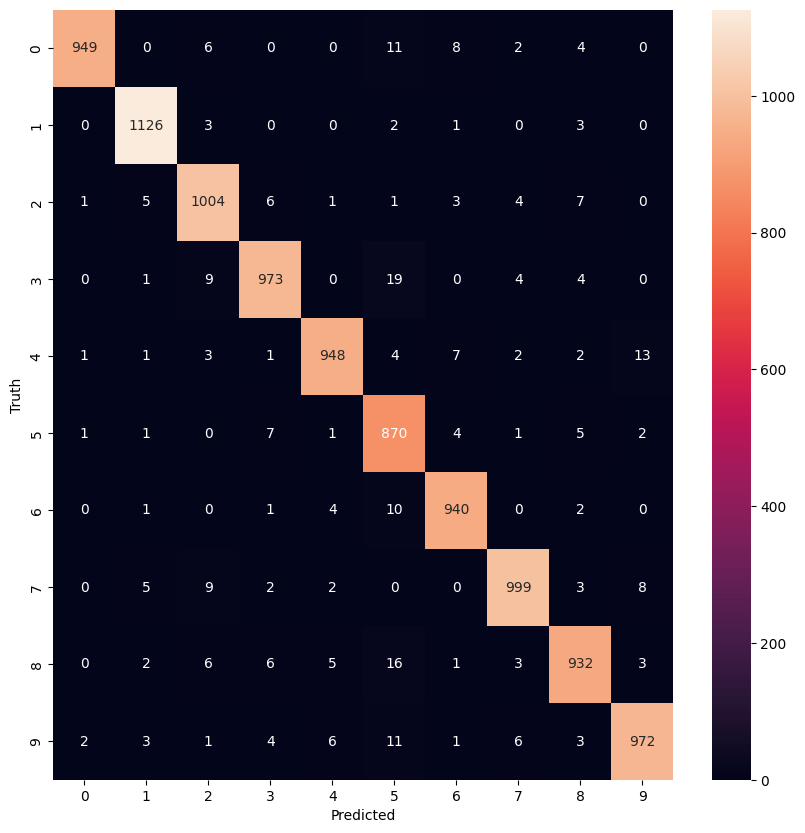

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

PREDICTIVE SYSTEM`

In [33]:
input_image=cv2.imread("/content/MNIST_digit.png")
grey=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(grey,(28,28))
resized=resized/255
reshaped=np.reshape(resized,(1,28,28))
pred=model.predict(reshaped)
print(np.argmax(pred))

1/1 [==============================] - 0s 128ms/step
3
